# ENPH 213 - Week 5 Lab

In this lab, we will be working on solving non-linear equations using a variety of methods while continuing to develop your Python skills.

When you are finished, please rename this notebook to LastName_ENPH213_Lab5, where LastName is your last name.  Submit that file to onQ.  Please be aware of a second notebook for Part 6.

For marking Parts 1-4 will be marked together (Weighted out of 10) and Parts 5 and 6 will be marked together (Weighted out of 5).

## Part 1

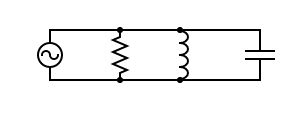

The impedance (Z) of a parallel RLC circuit, such as the one shown, can be represented as

$\Large \frac{1}{Z} = \sqrt{\frac{1}{R^2} + (\omega C - \frac{1}{\omega L})^2 }$

where R is the resistance, $C$ is the capacitance, and $L$ is the inductance.  Of note, the capacitance and inductance contribute a frequency ($\omega$) dependent contribution to $Z$.

Create a function $MyBisect(f, xa, xb)$ that can determine which frequency $\omega$ will give an impedance of $100~\Omega$ and uses the Bisection Method.  Use the following values for $R = 200~\Omega$, $L = 0.4$ H, and $C = 3 \times 10^{-6}$ F.  Determine $\omega$ to within a range of 0.00001, and justify your choice of $xa$ and $xb$.  Print the determined value for $\omega$ and the number of iterations it took to acheive it.

In [103]:
#Import Libraries
import numpy as np

#Define Values
R = 200
L = 0.4
C = 3*(10**-6)
Z=100

#This function will perform a bisection polynomial solution... Needs two points and a function, and will iterate until either the exact root is found or a x value within 0.00001 of the root.
def MyBisect(f,xa,xb):
    
    #Iteration count
    count = 0
    
    xmid = (xb+xa)/2
    
    #This while loop will execute until the max error (space between the two bisected points) is less than the accepted max
    while np.abs(f(xmid)) > 0.00001:
        
        #Calculate the midpoint
        xmid = (xb+xa)/2
        
        #First case, need to adjust the top down
        if f(xa)*f(xmid)<0:
            xb = xmid
            count+=1
            
        #Second case, need to bring the bottom up
        elif f(xb)*f(xmid) < 0:
            xa = xmid
            count+=1
        
        #Just in case we get the actual zero as the mid
        #elif (f(xmid)==0):
            #return xmid
        
        #There are NO Zeros contained between the points, abort mission
        else:
            print("Bisection Fails!")
            return None
        
    #here, we have found a number within error. Return and print the iterations
    return [(xa+xb)/2,count-1]

#Function to use (-100 adjusts it to allow for comparison when Z = 100 instead of Z = 0)
def fUse(x):
    return ((np.sqrt((1/R**2)+(x*C-1/(x*L))**2)))-(1/Z)

#Run our function (We want to use two endpoints on EITHER SIDE of Z=100)
#This means, as the Z function is an absolute "V" shape, that we need to have a w value LARGER than ~200 and SMALLER than ~200
print("Found the value within error after", MyBisect(fUse,10,1000)[1],"iterations!")
print("Value of w:",np.round(MyBisect(fUse,10,1000)[0], 8))

Found the value within error after 9 iterations!
Value of w: 264.75097656


# Part 2

Consider the tank on a water truck, which approximates as a cylinder lying on its side.  The diameter of the tank is 2.3 m and its length is 5.9 m.  For a cylinder lying horizontal, the volume a liquid $V$ will occupy at a height $x$ in the cylinder is

$\Large V = \left[r^2 \cos^{-1}\left( \frac{r-x}{r} \right) - (r-x)\sqrt{2rx-x^2}  \right] L$

where $r$ is the radius of the cylinder and $L$ is its length.  Create a function $MyNewton(f, fderiv, x1)$ that can accept a function and its derivative to determine the height of water in the tank for a specific volume.  In particular, what height of water in the tank is needed for a job requiring 14 m$^3$ of water.  Estimate the error in the height using the relation

$\Large error = \left| \frac{x_{i+1} - x_i}{x_i} \right|$

Determine $x$ to within an error of 0.00001.  Print the determined value for $x$ and the number of iterations it took to acheive it.  Note: $\cos^{-1} = \arccos$

You can validate your code by considering a tank that is half full.

In [104]:
#Constants
D = 2.3
L = 5.9
r = D/2

#Newton function
def MyNewton(f,fderiv,x1):
    #Find the next point
    x2 = x1-(f(x1)/fderiv(x1))
    count = 0
    err = np.abs((x2-x1)/x1)
    
    #While loop until the proper error is found
    while err > 0.00001:
        count+=1
        x1 = x2
        x2 = x1-(f(x1)/fderiv(x1))
        err = np.abs((x2-x1)/x1)
    return [x2,count]

#Volume
def VolumeFunc(x):
    return L*((r**2*np.arccos((r-x)/r))-((r-x)*np.sqrt(2*r*x-x**2)))-14

#Volume Derivative
def VolumeDeriv(x):
    return L*((r/np.sqrt(1-((r-x)**2/r**2)))-(((2*x**2)-4*r*x+r**2)/np.sqrt(2*r*x-x**2)))

#Print our results
print("Found the value within error after", MyNewton(VolumeFunc,VolumeDeriv, 0.5)[1],"iterations!")
print("x value:", MyNewton(VolumeFunc,VolumeDeriv, 0.5)[0])

Found the value within error after 3 iterations!
x value: 1.2787491250060228


# Part 3

Create a function $MySecant (f, x1, x2)$ employing the Secant Method to solve the RLC-circuit question from Part 1 and determining the which frequency $\omega$ will give the same impedance of $100~\Omega$.  Determine $\omega$ to within a range of 0.00001 using an error estimate as in Part 2.  Print the determined value for $\omega$ and the number of iterations it took to acheive it.

In [105]:
#If not redefined, the secant function will use the L from part 2 (NOT GOOD!!)
L=0.4

#Function to perform a secant root solution, using two starting points and a function.
def MySecant(f,x1,x2):
    
    #Initial calculation of the first "root" (x axis intercept)
    x3 = x2 - f(x2)*((x2-x1)/f(x2)-f(x1))
    
    #Count of iterations
    count = 0
    
    #This while loop will execute until the max error (given in part 2) is below the desired threshold
    while (x2-x1)/x1>0.00001:
        
        #Calculate the midpoint again
        x3 = x2 - f(x2)*((x2-x1)/(f(x2)-f(x1)))
        
        #Move the two points to where the next iteration needs to be
        x1 = x2
        x2 = x3
        count+=1
    
    #Now we have FOUND the value, and want to return it along with the number of iterations.
    return [x3,count]

#The two values used here don't really matter, as they are not required to bracket the root in order to solve.
print("Value found after", MySecant(fUse,0.01,0.02)[1],"iterations!")
print("The w value is:", np.round(MySecant(fUse,0.01,0.02)[0], 8))

#Here, you can compare to the value above in Part 1 and see that they are indeed identical up to the fifth decimal place and beyond! However, this method converges quicker!

Value found after 27 iterations!
The w value is: 264.44945469


# Part 4

We can determine how much of your ice cubes are below the surface of your drink.  As will all good physics calculations, we will approximate an ice cube as a sphere.  When placed in the water, gravity will pull the ice cube down with a force $F_g = mg$, where $m$ is the mass of the ice cube $m = \rho V$, where $\rho$ is the density of the ice $\rho_{ice} = 0.917 g/cm^3$ and $V$ is the volume of a sphere $V_{sphere} = \frac{4}{3} \pi r^3$.

As the ice cube sinks in the liquid, Archimedes' Principle states that the upward force is equal to the weight of the fluid displaced by the ice cube.  Of note here, assume that the density of the liquid is that of water, $\rho_{water} = 1.00 g/cm^3$, and the volume of the sphere exposed a height $d$ **above** the surface of the liquid is 

$\large V_{above} = \frac{\pi d^2}{3}(3r-d)$.

Determine the equation to solve, and choose one of the above methods to determine the result.  Assume that the radius of the ice cube is 1.00 cm.

$Q$:  Does you answer seem reasonable?  Instead of an ice cube, consider a ping pong ball with a density of $0.1 g/cm^3$.  Is it what you would expect?

In [106]:
#Constants
pice = 0.917
pwater = 1.00
rice = 1
g = 9.81
pPingPong = 0.1

#Force Summations for each ice and ping pong
FIce = lambda d: (4*np.pi/3-np.pi*d**2*(3-d))*pwater-4*np.pi/3*pice
FPingPong = lambda d: (4*np.pi/3-np.pi*d**2*(3-d))*pwater-4*np.pi/3*pPingPong

#Do a bisection for the ice cube
res = MyBisect(FIce,0,3)

print("Distance exposed for the ice cube =", res[0], "cm")
print("Iterations taked:", res[1],"!")

print("\n")


#Do a bisection for the ping pong ball
res = MyBisect(FPingPong,0,3)

print("Distance exposed for the ping pong ball =", res[0], "cm")
print("Iterations taked:", res[1],"!")

#Yes, the answer seems reasonable,as a majority of the ping pong ball is above the water, while the ice cube is almost completely submerged!

Distance exposed for the ice cube = 0.1988067626953125 cm
Iterations taked: 14 !


Distance exposed for the ping pong ball = 0.7265152931213379 cm
Iterations taked: 19 !


# Part 5

In the lecture, we looked at the Kronig-Penny model for the movement of an electron in a crystal.  The analytical solution from Schrodinger's equation is:

$\Large P' \frac{\sin \alpha a}{\alpha a} + \cos \alpha a = \cos k a$

where the energy $E$ is embedded in the $\alpha$ term.  To simplify the calculation of this equation, we will replace all constants with "1", which leaves

$\Large \frac{\sin E}{E} + \cos E = \cos k$

Solve this equations for different values of $k$ from 0 to 3$\pi$, in the ranges $0 \leq k \leq \pi$, $\pi \leq k \leq 2\pi$, $2\pi \leq k \leq 3\pi$, and using at least 50 points per range.  The function will have multiple roots that will oscillate.  Given that we are solving for Energy, there can be only 1 value of $E$ for any value of $k$. So, use the lowest root for the first range of $k$, the second root for the next range of $k$, etc.  Your solutions should replicate the figure in the notes.  One feature you should observe is that as $E$ approaches the end of the range, its slope should go to zero.  When plotting, use 3 different plots, otherwise they will be connected across the gaps.

Ideally, this is performed in a single FOR loop.

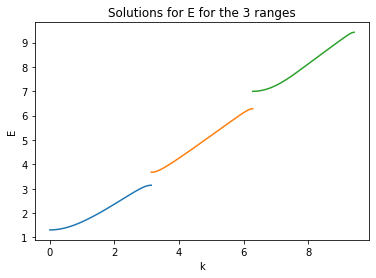

In [102]:
from matplotlib import pyplot as plt

#Set the k values
totalSpan = np.linspace(0.01,10,50)
k1 = np.linspace(0,np.pi,num=50)
k2 = np.linspace(np.pi,2*np.pi, num=50)
k3 = np.linspace(2*np.pi, 3*np.pi, num=50)

#Function that returns the zeros we want
def KronPen(E):
    return np.sin(E)/E+np.cos(E)-np.cos(k)

#Three E arrays
Arr1,Arr2,Arr3 = np.zeros(50),np.zeros(50),np.zeros(50)

#Solve using a for loop in order to do 1 point at a time (in each array)
for i in range (np.size(k1)):
    #First Range
    k = k1[i]
    temp = MyBisect(KronPen,1,totalSpan[16])
    Arr1[i] = temp[0]
    
    #Second Range
    k = k2[i]
    temp = MyBisect(KronPen,totalSpan[16],6.5)
    Arr2[i] = temp[0]
    
    #Third Range
    #Secant was used here because it fixes an overflow error
    k = k3[i]
    temp = MySecant(KronPen,7.8,8)
    Arr3[i]=temp[0]
    
#Now lets plot some output!
#The three solution ranges, all in different colours!
plt.figure(2)
plt.plot(k1,Arr1)
plt.plot(k2,Arr2)
plt.plot(k3,Arr3)
plt.title("Solutions for E for the 3 ranges")
plt.xlabel("k")
plt.ylabel("E")
plt.show()    

# Part 6

To come later in a separate notebook.

## Acknowledgements

Please comment on any help that you received from your group members or others concerning this Lab assignment.